In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython.display import Image

In [9]:
! jq -c 'select(.review_count>450)' yelp_academic_dataset_business.json > train_business.json

In [10]:
business_df = pd.read_json("train_business.json", lines=True)

In [11]:
business_df=business_df[business_df['categories'].isna()==False]

In [12]:
restaurants=business_df[business_df['categories'].apply(lambda x: 'Restaurants' in x)]

In [13]:
restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
1,XDv29FffNd2dWnDOtZP-wg,Sapporo Ramen,1815 Massachusetts Ave,Cambridge,MA,02140,42.387212,-71.118532,3.5,635,1,"{'RestaurantsReservations': 'False', 'Caters':...","Ramen, Restaurants, Japanese","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
2,bP6goJODwRnM3AVy45Kn9w,Papi's Cuban & Caribbean Grill,216 Ponce De Leon Ave NE,Atlanta,GA,30308,33.772758,-84.380375,4.0,1001,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Caribbean, Cuban, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,vecuat0jOia-CJveW3ngDw,Schmidt's Sausage Haus,240 E Kossuth St,Columbus,OH,43206,39.946268,-82.991044,4.0,1354,1,"{'GoodForKids': 'True', 'HasTV': 'False', 'Res...","Caterers, Bars, Sandwiches, Pubs, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
4,6Y0lQh4O-9JCutgyuMNq0g,Loca Luna,550 Amsterdam Ave NE,Atlanta,GA,30306,33.788608,-84.369091,3.5,658,1,"{'NoiseLevel': 'u'loud'', 'RestaurantsAttire':...","Latin American, Tapas Bars, Brazilian, Restaur...","{'Monday': '0:0-0:0', 'Thursday': '16:0-22:0',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,SGuhwC7vyrpYnUm6MBWSlQ,Santiago's Bodega,"1185 Spring Centre S Blvd, Ste 1080",Altamonte Springs,FL,32714,28.687309,-81.392135,4.5,472,1,"{'Music': '{'dj': False, 'background_music': F...","Lounges, Spanish, Restaurants, Bars, Tapas Bar...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2316,fTgnVCCu6k_Ds25Nz73s5Q,Sushi Zushi,"1611 W 5th St, Ste 105",Austin,TX,78703,30.274161,-97.764474,3.0,456,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Sushi Bars, Japanese, Soup, Restaurants, Asian...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2317,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,1,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',..."
2318,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."


In [14]:
restaurants.groupby('city').count().idxmax()

business_id     Austin
name            Austin
address         Austin
state           Austin
postal_code     Austin
latitude        Austin
longitude       Austin
stars           Austin
review_count    Austin
is_open         Austin
attributes      Austin
categories      Austin
hours           Austin
dtype: object

In [15]:
austin=restaurants[(restaurants['city']=='Austin')&(restaurants['stars']>4)]
austin

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,J8Ha6yIvGoU-E31jnCq7Ew,Barley Swine,"6555 Burnet Rd, Ste 400",Austin,TX,78757,30.341274,-97.738389,4.5,1086,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...","Restaurants, Nightlife, American (New), Bars, ...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
48,KEh3efWSOIzd8BvuW-X4-g,Phoebe's Diner,533 W Oltorf St,Austin,TX,78704,30.241524,-97.759295,4.5,997,1,"{'RestaurantsReservations': 'False', 'Business...","Breakfast & Brunch, Restaurants, Diners, Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."
81,YZs1gNSh_sN8JmN_nrpxeA,Terry Black's Barbecue,1003 Barton Springs Rd,Austin,TX,78704,30.259692,-97.754801,4.5,3555,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Sandwiches, Barbeque, Southern, Restaurants, S...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
91,KIHoGUfCOLhBFQVSAN4QSg,Suerte,1800 E 6th St,Austin,TX,78702,30.262278,-97.723276,4.5,521,1,"{'RestaurantsReservations': 'True', 'BikeParki...","Mexican, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
114,XqNgfxyXP3kz8t3iG8ehZA,The Vegan Nom,2324 E Cesar Chavez,Austin,TX,78702,30.255168,-97.718217,4.5,495,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Food Trucks, Restaurants, Food Stands, Food, T...","{'Tuesday': '9:0-23:0', 'Wednesday': '9:0-23:0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,SmNKuXHrcrojfKp8tS5DRw,Wholy Bagel,"4404 W William Cannon Dr, Ste P",Austin,TX,78749,30.223671,-97.838787,4.5,766,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bagels, Breakfast & Brunch, Food, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."
2246,SWdiMa_8Oq9FIAKB1sJ0hw,Arlo's,900 Red River St,Austin,TX,78701,30.269513,-97.736244,4.5,628,1,"{'Alcohol': 'u'full_bar'', 'NoiseLevel': 'u'av...","Restaurants, Street Vendors, Vegetarian, Food ...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
2251,bREJPIvNCP1uzMdfn4fobg,Garbo’s Restaurant,12709 North Mopac Expy,Austin,TX,78727,30.423622,-97.702057,4.5,583,1,"{'DogsAllowed': 'False', 'BikeParking': 'True'...","Seafood, Restaurants, Tapas/Small Plates","{'Tuesday': '11:0-20:0', 'Wednesday': '11:0-20..."
2276,tG7C9aZpYmj0-Z8hZC-0cg,SLAB BBQ & Beer,"9012 Research Blvd, Ste C4",Austin,TX,78758,30.371310,-97.724651,4.5,910,1,"{'Music': '{'dj': False, 'background_music': F...","Restaurants, Nightlife, Beer, Wine & Spirits, ...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."


In [16]:
business_ids=austin['business_id'].values

In [17]:
len(business_ids)

91

In [18]:
!rm subset_review.json
!touch subset_review.json
! jq -c 'select(.stars>3.5)' ./yelp_academic_dataset_review.json > train_review.json

In [19]:
for i in business_ids:
    !grep -- $i ./train_review.json | shuf -n 120 >> ./subset_review.json

In [20]:
reviews = pd.read_json("subset_review.json", lines=True)

In [21]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,6n887tRxgWvSYVvn4_OBtw,ZHSAK1gMqp0ILBvG_K5gkQ,J8Ha6yIvGoU-E31jnCq7Ew,5,1,0,0,By far one of the best restaurants in Austin. ...,2013-02-14 17:52:48
1,4gMjn6pxe0YeUiSURb9pWA,SeYvSEQFK-2ePSFfN8JsZg,J8Ha6yIvGoU-E31jnCq7Ew,5,1,0,1,Prepare for one of the best meals in your life...,2014-01-09 17:20:56
2,PxsMSmWRJWNWgtZExCkmPw,j8BpF83X062-sipnfzq5QA,J8Ha6yIvGoU-E31jnCq7Ew,5,1,3,1,This place is absolutely fabulous. My mother a...,2015-07-23 14:05:23
3,sA71QIk_xpPgDDS-n5lGiQ,1aaVE_5JOhXo2nB1P7WkCA,J8Ha6yIvGoU-E31jnCq7Ew,5,1,0,1,Barley Swine has a casual atmosphere with grea...,2013-03-23 02:33:24
4,3kZ9SHi6nrNbIqoT447-LA,HEV9i_lHSMvrg7oqnykCCA,J8Ha6yIvGoU-E31jnCq7Ew,5,9,3,7,Driving by and looking at this building you co...,2011-09-30 14:09:47
...,...,...,...,...,...,...,...,...,...
10915,1079VkrYQtDFEuD6nqdeuQ,2wWq3jSzUkWlC2SenMB0fg,wl45Bg9eIl5XpFoDt48dcg,5,1,1,1,Tom Kha is always on point. Whether you get it...,2019-01-09 01:16:47
10916,GqBBcNyL21U3cZeM5USzIw,MzpVt463xPg-5qUKFRm_xA,wl45Bg9eIl5XpFoDt48dcg,5,1,0,0,Excellent flavor and good portion size for the...,2015-09-21 23:56:10
10917,thu-hbqeFQuvw0JVLBY3tA,e4IKtILogpMq8aBMSTLMTA,wl45Bg9eIl5XpFoDt48dcg,5,0,0,0,Incredible food... my favorite banh mi in cent...,2018-07-08 18:34:47
10918,k31GhhvB-gkYC7wsiG0ijg,CFik5DmL_c2gQ9BXnM38vQ,wl45Bg9eIl5XpFoDt48dcg,4,0,0,0,"I'll be honest, over the last few years, I hav...",2012-02-28 23:18:51


In [22]:
reviews = reviews.loc[:,["business_id", "text"]]
reviews = reviews.groupby("business_id")["text"].unique().reset_index()
reviews["text"] = reviews["text"].str.join(' ')

In [23]:
reviews

,business_id,text
0,-IIvmjoEKa9Trhf4OxzJeA,A must stop for brunch while in a Austin! We h...
1,-qjkQHH-5O8BAztc6udOuw,TacoDeli is an oasis in an otherwise lunch-bar...
2,1Eq16r_MSnvPsnIykBdy9w,With three Heathens PLUS their gaggle of frien...
3,1JL4vX8-FA7dPfqZ-cdpcw,Everyone raves about these tacos so it was a m...
4,2VJ91McOlLP_d_pSOEv_nQ,I know people who love Alamo b/c sometimes alc...
...,...,...
88,wMgWB_27X6Wl-K1mHokAtw,Orderd the Spicy Miso Ramen w/sweet corn and f...
89,wQ8XK2NJAL2csx_LmZfz4g,"Delicious salsa sampler to start, loved the so..."
90,wl45Bg9eIl5XpFoDt48dcg,My wife and I went here for lunch today on a w...
91,ypMOQQV3gMc2kI8ZYdklSQ,7 year old requested his birhtday party at Pin...


In [24]:
business_reviews = austin[["name", "business_id"]].merge(reviews)[["name","text"]]
business_reviews

,name,text
0,Barley Swine,By far one of the best restaurants in Austin. ...
1,Phoebe's Diner,Best omelet I've ever had. If you like a littl...
2,Terry Black's Barbecue,Based on the reviews I had to try the BBQ. I o...
3,Suerte,Oh my SO good on every level. We had a reserv...
4,The Vegan Nom,Amazing food every time been coming here for y...
...,...,...
86,Wholy Bagel,"Best bagels in Austin, hands down! I'm origina..."
87,Arlo's,BLOWN AWAY!\n\nThe burgers are amazing and end...
88,Garbo’s Restaurant,"I don't post many reviews, but just had to mak..."
89,SLAB BBQ & Beer,A M A Z I N G ! \nNo bun options for low carb ...


In [25]:
from collections import Counter
import heapq
from scipy.cluster.hierarchy import linkage, leaves_list
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', min_df=0.2, max_df=0.8)
tfidf = tfidf_vectorizer.fit_transform(business_reviews['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

1654

In [37]:
import sklearn.decomposition as skd

In [55]:
nmf_mod=skd.NMF(n_components=8, init='nndsvda', max_iter=500)
W=nmf_mod.fit_transform(tfidf.T)
H=nmf_mod.components_
matrix=(W,H)

In [76]:
Hdf=pd.DataFrame(H, columns=['business '+ str(i) for i in range(1,92)])
Hdf

,business 1,business 2,business 3,business 4,business 5,business 6,business 7,business 8,business 9,business 10,...,business 82,business 83,business 84,business 85,business 86,business 87,business 88,business 89,business 90,business 91
0,0.543082,0.186288,0.023241,0.287101,0.000000,0.270088,0.407173,0.216200,0.297583,0.209857,...,0.386283,0.655938,0.357348,0.000000,0.189473,0.000000,0.000000,0.047071,0.000000,0.000000
1,0.006902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002486,0.020949,0.011639,...,0.000000,0.000000,0.015810,0.502118,0.012379,0.025962,0.000000,0.000000,0.001329,0.000000
2,0.000000,0.026167,0.000000,0.397071,0.432387,0.041376,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019038,0.000000,0.000000,0.000000,0.024952,0.006520,0.000000,0.000000
3,0.012573,0.124423,0.564063,0.093683,0.000000,0.000000,0.010324,0.020044,0.014023,0.000000,...,0.008710,0.000000,0.037322,0.003299,0.004435,0.013251,0.010403,0.004439,0.432758,0.000000
4,0.016973,0.319401,0.000000,0.000000,0.000000,0.253731,0.000000,0.031997,0.000994,0.050729,...,0.000000,0.000000,0.036575,0.144560,0.031324,0.342949,0.000000,0.042720,0.103244,0.016609
5,0.017722,0.000000,0.000000,0.007620,0.000000,0.000000,0.238186,0.000000,0.000000,0.000000,...,0.330315,0.007054,0.000000,0.014456,0.000000,0.058876,0.000000,0.569838,0.002708,0.000000
6,0.075158,0.000000,0.000000,0.005810,0.000000,0.000000,0.084534,0.249230,0.169148,0.112325,...,0.015537,0.000000,0.189682,0.000000,0.019779,0.005857,0.000000,0.000000,0.000000,0.561388
7,0.004266,0.000000,0.000905,0.000000,0.371671,0.047200,0.002325,0.000000,0.091832,0.008161,...,0.026423,0.000000,0.000000,0.005841,0.016679,0.032340,0.565839,0.022415,0.008668,0.000000


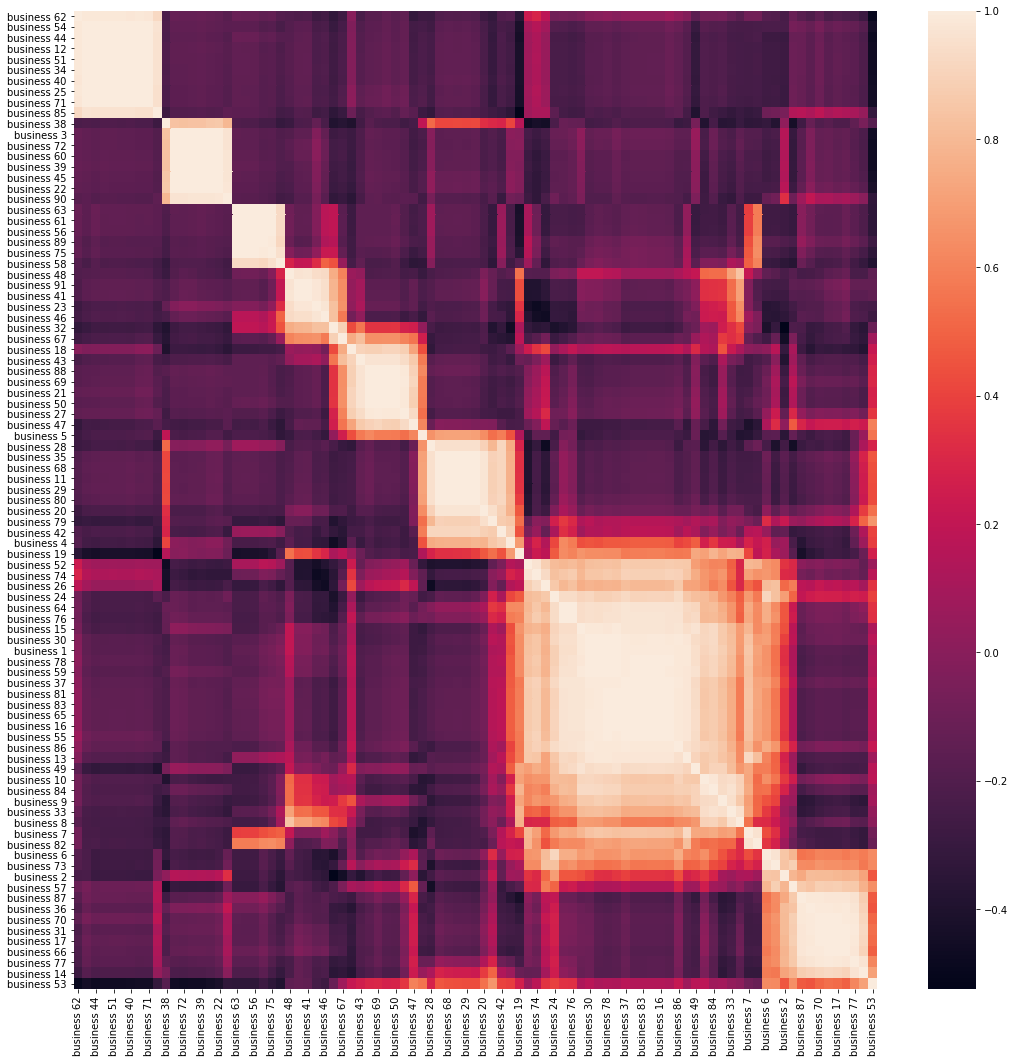

In [80]:
correlations=Hdf.corr()
order=leaves_list(linkage(correlations.transpose(),optimal_ordering=True))
plt.figure(figsize=(18,18))
sns.heatmap(correlations.iloc[order,order])

In [83]:
austin_names=austin.loc[:,'name'].reset_index(drop=True)
austin_names

0               Barley Swine
1             Phoebe's Diner
2     Terry Black's Barbecue
3                     Suerte
4              The Vegan Nom
               ...          
86               Wholy Bagel
87                    Arlo's
88        Garbo’s Restaurant
89           SLAB BBQ & Beer
90                   NG Cafe
Name: name, Length: 91, dtype: object

In [114]:
def recommend(name):
    index=austin_names[austin_names==name].index[0]
    business=correlations.iloc[index,:]
    results=heapq.nlargest(10, range(len(business)), business.__getitem__)
    
    for i in results:
        print(austin_names[i])        
        
recommend('SLAB BBQ & Beer')

SLAB BBQ & Beer
Rudy's "Country Store" and Bar-B-Q
Franklin Barbecue
Rudy's "Country Store" and Bar-B-Q
la Barbecue
Terry Black's Barbecue
Micklethwait Craft Meats
Valentina's Tex Mex BBQ
Phoebe's Diner
Hey!... You Gonna Eat or What?


In [118]:
recommend('Pho Please')

Pho Please
Sip Saam Thai
NG Cafe
Tân Mỹ
1618 Asian Fusion
Koriente
Honest Mary's
Troy ATX
Asiana Indian Cuisine
The Peached Tortilla


In [120]:
recommend('DeSano Pizzeria Napoletana')

DeSano Pizzeria Napoletana
Home Slice Pizza
More Home Slice Pizza
Via 313 Pizza - West 6th
Pinthouse Pizza
Via 313 Pizza - Oak Hill
Via 313 Pizza - North Campus
Pieous
Jester King Brewery
Little Deli & Pizzeria


In [123]:
recommend('Papalote Taco House')

Papalote Taco House
Veracruz All Natural
Pueblo Viejo
Torchy's Tacos
Tacodeli
Habanero Mexican Cafe
Cabo Bob's Burritos
Turf N Surf Po' Boy
Eldorado Cafe
Suerte
